In [1]:
# import libraries

import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sy
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

In [2]:
# read train_data files
train_data_2016 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/imputation/data2016.csv")
# read train_data file
train_data_2017 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/imputation/data2017.csv")

In [3]:
# check missing values
train_data_2016[train_data_2016.isnull().any(axis=1)]

,logerror,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet15,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxpercentage,transaction_quarter


In [5]:
# check missing values
train_data_2017[train_data_2017.isnull().any(axis=1)]

,logerror,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet15,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxpercentage,transaction_quarter


In [6]:
train_data_2016=train_data_2016.drop('assessmentyear',axis=1)

In [7]:
train_data_2017=train_data_2017.drop('assessmentyear',axis=1)

In [8]:
# split the dependent and indepandent variables
X_2016 = train_data_2016.drop('logerror',axis = 1)
y_2016 = train_data_2016['logerror'].values.astype(np.float64)

# split the dependent and indepandent variables
X_2017 = train_data_2017.drop('logerror',axis = 1)
y_2017 = train_data_2017['logerror'].values.astype(np.float64)

In [11]:
# Fit a linear model and predict on test variable
lm_2016= LinearRegression()
x_train_2016,x_test_2016,y_train_2016,y_test_2016 = train_test_split(X_2016,y_2016,test_size=0.70,random_state=100)

lm_2016.fit(x_train_2016,y_train_2016)
prd_2016=lm_2016.predict(x_test_2016)

In [12]:
# Fit a linear model and predict on test variable
lm_2017= LinearRegression()
x_train_2017,x_test_2017,y_train_2017,y_test_2017 = train_test_split(X_2017,y_2017,test_size=0.70,random_state=100)

lm_2017.fit(x_train_2017,y_train_2017)
prd_2017=lm_2017.predict(x_test_2017)

In [14]:
# performance metrics
from sklearn import metrics
print("MAE--->",metrics.mean_absolute_error(y_test_2016,prd_2016))
print("MSE--->",metrics.mean_squared_error(y_test_2016,prd_2016))
print("RMSE--->",np.sqrt(metrics.mean_squared_error(y_test_2016,prd_2016)))
print("R^2--->", lm_2016.score(x_test_2016,y_test_2016))

MAE---> 3.579998037762716
MSE---> 778277.8790009575
RMSE---> 882.2005888690834
R^2---> -29919421.409815103


In [16]:
# performance metrics
from sklearn import metrics
print("MAE--->",metrics.mean_absolute_error(y_test_2017,prd_2017))
print("MSE--->",metrics.mean_squared_error(y_test_2017,prd_2017))
print("RMSE--->",np.sqrt(metrics.mean_squared_error(y_test_2017,prd_2017)))
print("R^2--->", lm_2017.score(x_test_2017,y_test_2017))

MAE---> 0.07119114662206287
MSE---> 0.028506543700146523
RMSE---> 0.16883880981618687
R^2---> 0.9999999925639491


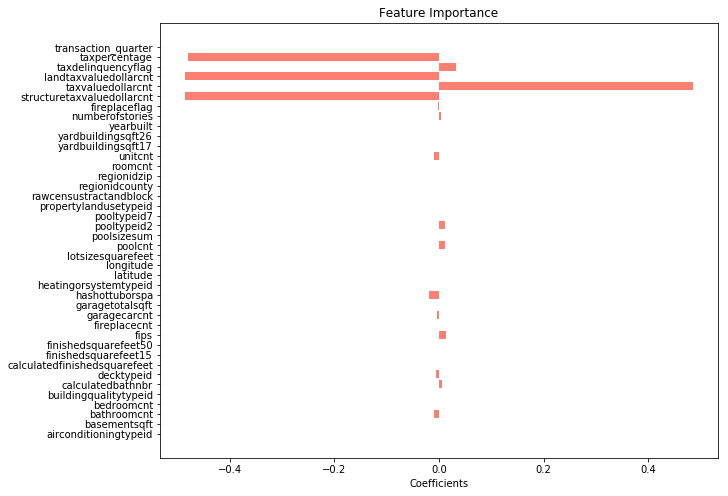

In [17]:
#Feature Importance
variables = X_2016.columns
coefficients = lm_2016.coef_
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.barh(variables,coefficients,color='salmon')
ax.set_xlabel("Coefficients")
ax.set_title("Feature Importance")
plt.show()

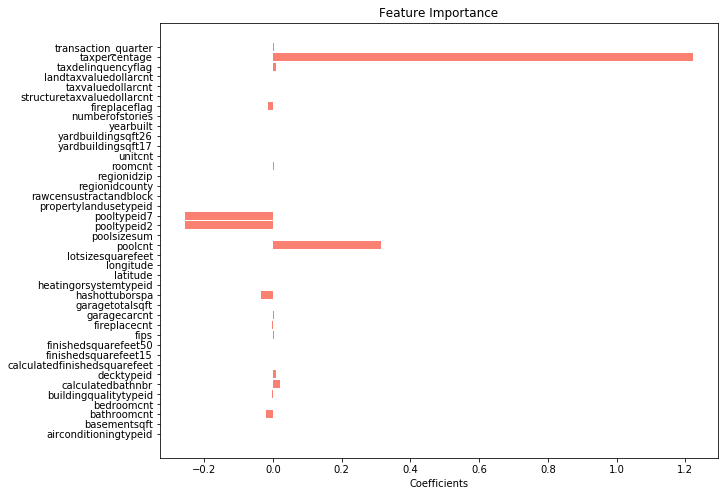

In [18]:
#Feature Importance
variables = X_2017.columns
coefficients = lm_2017.coef_
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.barh(variables,coefficients,color='salmon')
ax.set_xlabel("Coefficients")
ax.set_title("Feature Importance")
plt.show()

In [19]:
# Random Forest
# import libraries

import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sy
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Random forest with 5 trees and 5 depth
rf = RandomForestRegressor(n_estimators=4,max_depth=5,random_state=42,criterion='mae')
rf.fit(x_train_2016, y_train_2016)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
y_pred_2016=rf.predict(x_test_2016)
df_y=abs(y_test_2016-y_pred_2016)
MAE=df_y.sum()/len(y_test_2016)
print(MAE)

0.06879869526688083


In [22]:
# Random forest with 5 trees and 5 depth
rf.fit(x_train_2017, y_train_2017)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
y_pred_2017=rf.predict(x_test_2017)
df_y=abs(y_test_2017-y_pred_2017)
MAE=df_y.sum()/len(y_test_2017)
print(MAE)

0.06965368453149012


In [25]:
# XGBoost
# import libraries

import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sy
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
model = XGBRegressor()
xgb_2016 = model.fit(x_train_2016, y_train_2016)

In [27]:
model = XGBRegressor()
xgb_2017 = model.fit(x_train_2017, y_train_2017)

In [29]:
preds_2016 = xgb_2016.predict(x_test_2016)
mse = mean_squared_error(y_test_2016, preds_2016)
print("MSE: %f" % mse)

mae = mean_absolute_error(y_test_2016, preds_2016)
print("MAE: %f" % mae)


preds_2017 = xgb_2017.predict(x_test_2017)
mse = mean_squared_error(y_test_2017, preds_2017)
print("MSE: %f" % mse)

mae = mean_absolute_error(y_test_2017, preds_2017)
print("MAE: %f" % mae)

MSE: 0.026237
MAE: 0.069369
MSE: 0.043252
MAE: 0.073377
